## Step 1: Import data From Exercise 4.9

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Import the orders,products, and customers merged dataframe
df_ords_prods_customers_merged=pd.read_pickle(r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /02 Data/Prepared Data/df_ords_prods_merged2.pkl')

In [3]:
df_ords_prods_customers_merged=pd.read_pickle(r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /02 Data/Prepared Data/df_ords_prods_merged2.pkl')

In [4]:
sum(df_ords_prods_customers_merged['product_name'].isnull())

28171


## Step. 2: Correct the PII data

## This step was completed at an earlier stage.
#Drop the first and last name columns to ensure privacy of individuals, step already completed earlier
df_ords_prods_customers_merged=df_ords_prods_customers_merged.drop(column=['first_name','surname'])

## Step 3: Create a regional segmentation of the Dataset and determine whether there’s a difference in spending habits between the different U.S. regions. 

In [5]:
#Define the different regions of the customer base of the United States
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [6]:
#Assign the States in 'state' column to a region flag
df_ords_prods_customers_merged.loc[df_ords_prods_customers_merged['state'].isin(Northeast), 'region'] = 'Northeast'
df_ords_prods_customers_merged.loc[df_ords_prods_customers_merged['state'].isin(Midwest), 'region'] = 'Midwest'
df_ords_prods_customers_merged.loc[df_ords_prods_customers_merged['state'].isin(South), 'region'] = 'South'
df_ords_prods_customers_merged.loc[df_ords_prods_customers_merged['state'].isin(West), 'region'] = 'West'

In [7]:
#Check the results of 'state' indicator flag
df_ords_prods_customers_merged['region'].value_counts(dropna=False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [8]:
df_ords_prods_customers_merged.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [9]:
region_crosstab=pd.crosstab(df_ords_prods_customers_merged['region'],df_ords_prods_customers_merged['spending_flag'],dropna=False)

In [10]:
region_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


## Step 4: Create an exclusion flag for 'Low Activity Customers'

In [11]:
#Create a flag for customers with less than 5 customers
df_ords_prods_customers_merged.loc[df_ords_prods_customers_merged['max_order']<5,'customer_activity']='low activity'

In [12]:
#Create flag for customers with 5 orders or more 
df_ords_prods_customers_merged.loc[df_ords_prods_customers_merged['max_order']>=5,'customer_activity']='High Activity'

In [13]:
df_ords_prods_customers_merged['customer_activity'].value_counts(dropna=False)

High Activity    30992664
low activity      1441548
Name: customer_activity, dtype: int64

In [14]:
#Assign the low activity customers to seperate dataframe 
low_activity_customers=df_ords_prods_customers_merged[df_ords_prods_customers_merged['customer_activity']=='low activity']

In [15]:
low_activity_customers.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,customer_activity
1513,520620,120,1,3,11,NaN,196,2,0,Soda,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity
1514,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity
1515,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity
1516,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity
1517,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity


In [16]:
#Assign the high activity indicator flag 
high_activity_customers=df_ords_prods_customers_merged[df_ords_prods_customers_merged['customer_activity']=='High Activity']

In [17]:
path=r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /02 Data/Prepared Data'

In [18]:
#Export the low activity customers dataframe 
low_activity_customers.to_pickle(os.path.join(path,'low_activity_customers.pkl'))

In [19]:
#Export the high activity customers dataframe
high_activity_customers.to_pickle(os.path.join(path,'high_activity_customers.pkl'))

In [20]:
#Import dataframe to create a price label
df=pd.read_pickle(r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /02 Data/Prepared Data/orders_products_merged_updated.pkl')

In [21]:
df.head()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Most orders


In [22]:
#Define 'price label'
def price_label(row):
    if row['prices']<=5: return 'Low-Range Product'
    elif (row['prices']>5) and (row['prices']<=15): return 'Mid-Range Product'
    elif row['prices']>15: return 'High-end Product'
    else: return 'Not enough Data'
    

In [23]:
df_ords_prods_customers_merged.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,customer_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity


In [24]:
#Apply the new 'price_range' label to dataframe
df_ords_prods_customers_merged['price_label']=df_ords_prods_customers_merged.apply(price_label,axis=1)

In [25]:
#Count how many of each price range
df_ords_prods_customers_merged['price_label'].value_counts(dropna=False)

Mid-Range Product    21890146
Low-Range Product    10126384
High-end Product       417682
Name: price_label, dtype: int64

## Create if-then with for-loops from task 4.7 and task 4.9

In [26]:
#Create a new column in dataframe 
df_ords_prods_customers_merged['order_dow'].value_counts(dropna=False)

0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: order_dow, dtype: int64

In [27]:
#Assign 'Busiest_Day' indicator label on dataframe
df_ords_prods_customers_merged.loc[df_ords_prods_customers_merged['order_dow']==0,'Busiest_Day']='Busiest_Day'

In [28]:
df_ords_prods_customers_merged.loc[df_ords_prods_customers_merged['order_dow']==4,'Busiest_Day']='Least_Busy'

In [29]:
df_ords_prods_customers_merged.loc[~df_ords_prods_customers_merged['order_dow'].isin([0,4]),'Busiest_Day']='Average Day'

In [30]:
#Check the results of the 'Busiest_day' indicator flag
df_ords_prods_customers_merged['Busiest_Day'].value_counts()

Average Day    22437387
Busiest_Day     6209632
Least_Busy      3787193
Name: Busiest_Day, dtype: int64

In [31]:
#Check the 'customer_activity' flag
df_ords_prods_customers_merged['customer_activity'].value_counts(dropna=False)

High Activity    30992664
low activity      1441548
Name: customer_activity, dtype: int64

In [32]:
#Create a crosstab for 'customer_activity' vs. 'region'
activity_region=pd.crosstab(df_ords_prods_customers_merged['region'],df_ords_prods_customers_merged['customer_activity'],dropna=False)

In [33]:
activity_region

customer_activity,High Activity,low activity
region,,
Midwest,7267707,336103
Northeast,5470068,258279
South,10320462,481148
West,7934427,366018


In [34]:
#Import the high activity customers dataframe in order to conduct analysis only on High activity customers
high_activity_customers=pd.read_pickle(r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /02 Data/Prepared Data/high_activity_customers.pkl')

In [35]:
high_activity_customers.head(100)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,customer_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3317979,15,5,4,15,17.0,14715,1,1,Coconut Water,...,Woodard,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High Activity
96,2685110,15,7,1,11,17.0,14715,3,1,Coconut Water,...,Woodard,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High Activity
97,887727,15,9,2,13,7.0,14715,1,1,Coconut Water,...,Woodard,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High Activity
98,2600170,15,11,2,9,14.0,14715,1,1,Coconut Water,...,Woodard,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High Activity


## Step 5: Create a profile variable based on age,income, certain goods, gender, customer profile, and number of dependants

In [36]:
#Create a indicator based on age group
high_activity_customers.loc[high_activity_customers['age']<=29,'age_group']='19-29'
high_activity_customers.loc[(high_activity_customers['age']>29) & (high_activity_customers['age']<40),'age_group']='30-39'
high_activity_customers.loc[(high_activity_customers['age']>39) & (high_activity_customers['age']<50),'age_group']='40-49'
high_activity_customers.loc[(high_activity_customers['age']>49) & (high_activity_customers['age']<60),'age_group']='50-59'
high_activity_customers.loc[(high_activity_customers['age']>59) & (high_activity_customers['age']<70),'age_group']='60-69'
high_activity_customers.loc[high_activity_customers['age']>69,'age_group']='70 and over'

In [37]:
#Check the results 
high_activity_customers['age_group'].value_counts(dropna=False)

19-29          5823021
70 and over    5817756
40-49          4887575
30-39          4851629
50-59          4846498
60-69          4766185
Name: age_group, dtype: int64

In [38]:
#Create a indicator flag for income group
high_activity_customers.loc[high_activity_customers['income']<=75000,'income_group']='Lower Income'
high_activity_customers.loc[(high_activity_customers['income']>75000) & (high_activity_customers['income']<=120000),'income_group']='Middle Income'
high_activity_customers.loc[high_activity_customers['income']>120000,'income_group']='Upper Income'

In [39]:
#Check the 'income_group' results
high_activity_customers['income_group'].value_counts(dropna=False)

Middle Income    11888963
Lower Income      9916338
Upper Income      9187363
Name: income_group, dtype: int64

In [40]:
#Import the Departments Dataset
df_dept=pd.read_csv(r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /02 Data/Prepared Data/departments_wrangled.csv')

In [41]:
#Rename the columns to correct the format
df_dept=df_dept.rename(columns={'Unnamed: 0':'department_id'})

In [42]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [43]:
#Merge departments dataframe and high_activity_customers dataframe on 'departmenet_id'
df_high_merged=high_activity_customers.merge(df_dept,on='department_id')

In [44]:
#Check the merged results
df_high_merged[['user_id','department_id','department']].head(10)

,user_id,department_id,department
0,1,7,beverages
1,1,7,beverages
2,1,7,beverages
3,1,7,beverages
4,1,7,beverages
5,1,7,beverages
6,1,7,beverages
7,1,7,beverages
8,1,7,beverages
9,1,7,beverages


In [45]:
#Drop '_merge' column because it is not needed
df_high_merged = df_high_merged.drop(columns=['_merge'])


In [46]:
#Create an indicator flag called 'customer_profile' for the number of dependents in a household
df_high_merged.loc[(df_high_merged['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_high_merged['n_dependants']==0),'customer_profile']='Single Adult'
df_high_merged.loc[(df_high_merged['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_high_merged['n_dependants']>0),'customer_profile']='Young Parent'
df_high_merged.loc[(df_high_merged['fam_status']=='married') & (df_high_merged['n_dependants']<=2),'customer_profile']='Family'
df_high_merged.loc[(df_high_merged['fam_status']=='married') & (df_high_merged['n_dependants']>2),'customer_profile']='Big Family'

In [47]:
df_high_merged['customer_profile'].value_counts(dropna=False)

Family          14472584
Single Adult     7747032
Big Family       7290437
Young Parent     1482611
Name: customer_profile, dtype: int64

In [48]:
#Create a customer profile indicator based on marriage status,age, and number of dependants. 
df_high_merged.loc[(df_high_merged['fam_status']!='married') & (df_high_merged['n_dependants']>0),'customer_profile']='Singe Parent'

In [49]:
df_high_merged.loc[(df_high_merged['fam_status']!='married') & (df_high_merged['gender']=='Female') & (df_high_merged['n_dependants']==0),'customer_profile']='Single Female w/o Children'

In [50]:
df_high_merged.loc[(df_high_merged['fam_status']!='married') & (df_high_merged['gender']=='Male') & (df_high_merged['n_dependants']==0),'customer_profile']='Single Male w/o Children'

In [51]:
df_high_merged.loc[(df_high_merged['age']<35) & (df_high_merged['fam_status']=='married') & (df_high_merged['n_dependants']>0),'customer_profile']='Young Married Parent'

In [52]:
df_high_merged.loc[(df_high_merged['age']>=35) & (df_high_merged['fam_status']=='married') & (df_high_merged['n_dependants']>0),'customer_profile']='Older Married Parent'

In [53]:
df_high_merged.loc[(df_high_merged['fam_status']=='married') & (df_high_merged['n_dependants']==0),'customer_profile']='Married w/o Children'

In [54]:
#Check customer profile indicator 
df_high_merged['customer_profile'].value_counts(dropna=False)

Older Married Parent          17061351
Young Married Parent           4701670
Single Male w/o Children       3884900
Single Female w/o Children     3862132
Singe Parent                   1482611
Name: customer_profile, dtype: int64

In [55]:
#check columns
df_high_merged.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,region,customer_activity,age_group,income_group,department,customer_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,High Activity,30-39,Lower Income,beverages,Young Married Parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High Activity,30-39,Lower Income,beverages,Young Married Parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High Activity,30-39,Lower Income,beverages,Young Married Parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High Activity,30-39,Lower Income,beverages,Young Married Parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High Activity,30-39,Lower Income,beverages,Young Married Parent


In [56]:
#Replace all NaN values with 'High Range Product'
df_high_merged['price_range_loc'] = df_high_merged['price_range_loc'].fillna('high-range product')


In [57]:
#Create a customer profile indicator based on income,family status, age, and number of dependents.
df_high_merged.loc[(df_high_merged['fam_status']!='married') & (df_high_merged['income_group']=='Lower Income') & (df_high_merged['n_dependants']>0),'customer_profile']='Low Income Single Parent'


In [58]:
df_high_merged.loc[(df_high_merged['fam_status']!='married') & (df_high_merged['income_group']=='Middle Income') & (df_high_merged['n_dependants']>0),'customer_income_profile' ]='Middle Income Single Parent'

In [59]:
df_high_merged.loc[(df_high_merged['fam_status']!='married') & (df_high_merged['income_group']=='Upper Income') & (df_high_merged['n_dependants']>0),'customer_income_profile']='Upper Income Single Parent'

In [60]:
df_high_merged.loc[(df_high_merged['fam_status']!='married') & (df_high_merged['income_group']=='Lower Income') & (df_high_merged['gender']=='Female') & (df_high_merged['n_dependants']==0),'customer_income_profile']='Low Income Single Female w/o Child'

In [61]:
df_high_merged.loc[(df_high_merged['fam_status']!='married') & (df_high_merged['income_group']=='Middle Income') & (df_high_merged['gender']=='Female') & (df_high_merged['n_dependants']==0),'customer_income_profile']='Middle Income Single Female w/o Children'

In [62]:
df_high_merged.loc[(df_high_merged['fam_status']!='married') & (df_high_merged['income_group']=='Upper Income') & (df_high_merged['gender']=='Female') & (df_high_merged['n_dependants']==0),'customer_income_profile']='Upper Income Single Female w/o Children'

In [63]:
df_high_merged.loc[(df_high_merged['fam_status']!='married') & (df_high_merged['income_group']=='Lower Income') & (df_high_merged['gender']=='Male') & (df_high_merged['n_dependants']==0),'customer_income_profile']='Low Income Single Male w/o Children'

In [64]:
df_high_merged.loc[(df_high_merged['fam_status']!='married') & (df_high_merged['income_group']=='Middle Income') & (df_high_merged['gender']=='Male') & (df_high_merged['n_dependants']==0),'customer_income_profile']='Middle Income Single Male w/o Children'

In [65]:
df_high_merged.loc[(df_high_merged['fam_status']!='married') & (df_high_merged['income_group']=='Upper Income') & (df_high_merged['gender']=='Male') & (df_high_merged['n_dependants']==0),'customer_income_profile']='Upper Income Single Male w/o Children'

In [66]:
df_high_merged.loc[(df_high_merged['age']<30) & (df_high_merged['fam_status']=='married') & (df_high_merged['income_group']=='Lower Income') & (df_high_merged['n_dependants']>0),'customer_income_profile']='Low Income Married Young Parent'

In [67]:
df_high_merged.loc[(df_high_merged['age']<30) & (df_high_merged['fam_status']=='married') & (df_high_merged['income_group']=='Middle Income') & (df_high_merged['n_dependants']>0),'customer_income_profile']='Middle Income Married Young Parent'

In [68]:
df_high_merged.loc[(df_high_merged['age']<30) & (df_high_merged['fam_status']=='married') & (df_high_merged['income_group']=='Upper Income') & (df_high_merged['n_dependants']>0),'customer_income_profile']='Upper Income Married Young Parent'

In [69]:
df_high_merged.loc[(df_high_merged['age']>=30) & (df_high_merged['fam_status']=='married') & (df_high_merged['income_group']=='Lower Income') & (df_high_merged['n_dependants']>0),'customer_income_profile']='Low Income Married Older Parent'

In [70]:
df_high_merged.loc[(df_high_merged['age']>=30) & (df_high_merged['fam_status']!='married') & (df_high_merged['income_group']=='Upper Income') & (df_high_merged['gender']=='Male') & (df_high_merged['n_dependants'] == 0),'customer_income_profile']='Upper Income Single Male w/o Children'

In [71]:
df_high_merged.loc[(df_high_merged['age']>30) & (df_high_merged['fam_status']=='married') & (df_high_merged['income_group']=='Middle Income') & (df_high_merged['n_dependants']>0),'customer_income_profile']='Middle Income Married Older Parent'

In [72]:
df_high_merged.loc[(df_high_merged['age']>0) & (df_high_merged['fam_status']=='married') & (df_high_merged['income_group']=='Upper Income') & (df_high_merged['n_dependants']>0),'customer_income_profile']='Upper Income Married Older Parent'

In [73]:
df_high_merged.loc[(df_high_merged['fam_status']=='married') & (df_high_merged['income_group']=='Lower Income') & (df_high_merged['n_dependants']==0),'customer_income_profile']='Low Income Married w/o Children'

In [74]:
df_high_merged.loc[(df_high_merged['fam_status']=='married') & (df_high_merged['income_group']=='Middle Income') & (df_high_merged['n_dependants']==0),'customer_income_profile']='Middle Income Married w/o Children'

In [75]:
df_high_merged.loc[(df_high_merged['fam_status']=='married') & (df_high_merged['income_group']=='Upper Income') & (df_high_merged['n_dependants']==0),'customer_income_profile']='Upper Income Married w/o Children'

In [76]:
#Check Results
df_high_merged['customer_income_profile'].value_counts(dropna=False)

Middle Income Married Older Parent          7158802
Upper Income Married Older Parent           6845471
Low Income Married Older Parent             4761165
Low Income Married Young Parent             1782321
Middle Income Single Female w/o Children    1484710
Middle Income Single Male w/o Children      1461673
Low Income Single Male w/o Children         1257921
Low Income Single Female w/o Child          1219040
Upper Income Single Male w/o Children       1165306
Upper Income Single Female w/o Children     1158382
Middle Income Married Young Parent          1071368
NaN                                         1039785
Middle Income Single Parent                  568516
Upper Income Single Parent                    18204
Name: customer_income_profile, dtype: int64

In [77]:
df_high_merged.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,n_dependants,fam_status,income,region,customer_activity,age_group,income_group,department,customer_profile,customer_income_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,South,High Activity,30-39,Lower Income,beverages,Young Married Parent,Low Income Married Older Parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,South,High Activity,30-39,Lower Income,beverages,Young Married Parent,Low Income Married Older Parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,South,High Activity,30-39,Lower Income,beverages,Young Married Parent,Low Income Married Older Parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,South,High Activity,30-39,Lower Income,beverages,Young Married Parent,Low Income Married Older Parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,South,High Activity,30-39,Lower Income,beverages,Young Married Parent,Low Income Married Older Parent


In [78]:
df_high_merged['income_group'].value_counts(dropna=False)

Middle Income    11888963
Lower Income      9916338
Upper Income      9187363
Name: income_group, dtype: int64

In [79]:
path=r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /04 Analysis/Visualizations'

## Step 6: Create Visualizations to show the distribution of of profiles

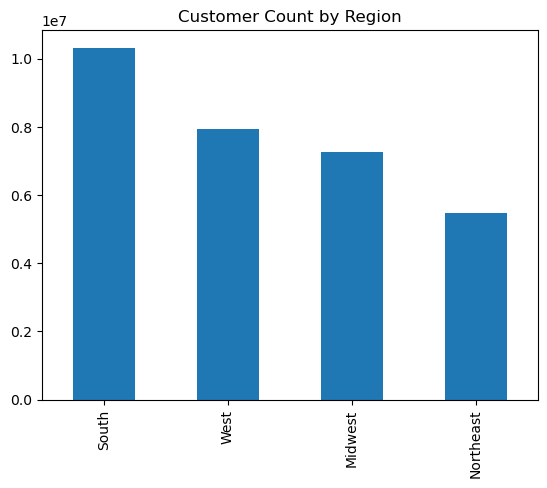

In [80]:
#Create a bar chart to visualize the number of orders in each different region
region_bar=df_high_merged['region'].value_counts().plot.bar(title='Customer Count by Region')

***Analytical Insight:

In [81]:
region_bar.figure.savefig(os.path.join(path,'region_bar.png'),bbox_inches='tight')

In [82]:
#Group by department and region
department_region=df_high_merged.groupby(['department','region']).size().unstack()

In [83]:
#Sort by ascending order 
department_region=department_region.loc[department_region.sum(axis=1).sort_values(ascending=True).index]

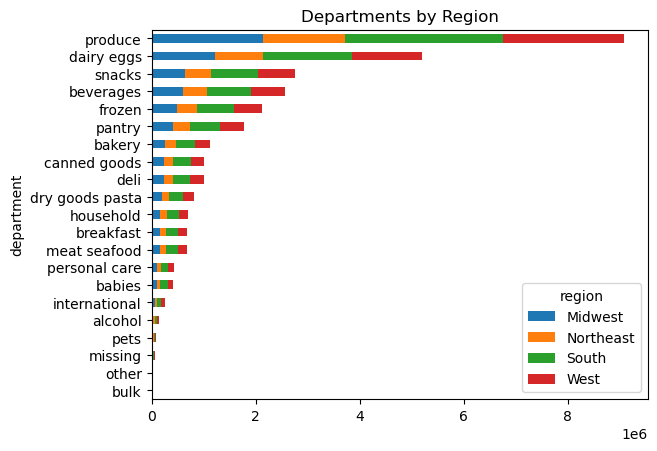

In [84]:
#Create a Bar Chart 
department_region_bar=department_region.plot.barh(stacked=True,title='Departments by Region')

In [85]:
#Export the Visualization
department_region_bar.figure.savefig(os.path.join(path,'department_region_bar.png'),bbox_inches='tight')

****The South region has the highest frequency of orders, followed by the West and Midwest regions. The Northeast region has the lowest frequency of customer orders.

In [86]:
#Group by customer income profile and region
customer_income_profile_region=df_high_merged.groupby(['customer_income_profile','region']).size().unstack()

In [87]:
 #Sort 
customer_income_profile_region=customer_income_profile_region.loc[customer_income_profile_region.sum(axis=1).sort_values(ascending=True).index]

Text(0, 0.5, 'Customer Income Profile')

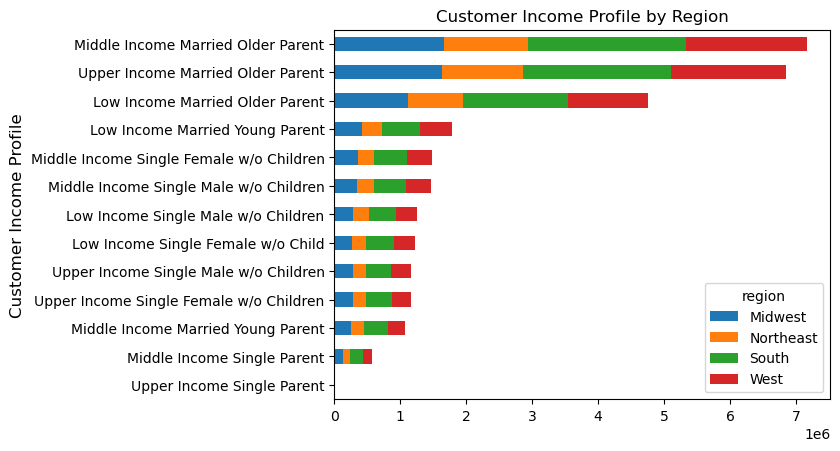

In [88]:
#Create a bar chart
customer_income_profile_region_bar=customer_income_profile_region.plot.barh(stacked=True,title='Customer Income Profile by Region')
plt.ylabel('Customer Income Profile',fontsize=12)

In [89]:
#Export the Visualization
customer_income_profile_region_bar.figure.savefig(os.path.join(path,'customer_income_profile_region_bar.png'),bbox_inches='tight')

In [90]:
#Group by customer profile and region
customer_profile_region=df_high_merged.groupby(['customer_profile','region']).size().unstack()

In [91]:
#Sort 
customer_profile_region=customer_profile_region.loc[customer_profile_region.sum(axis=1).sort_values(ascending=True).index]

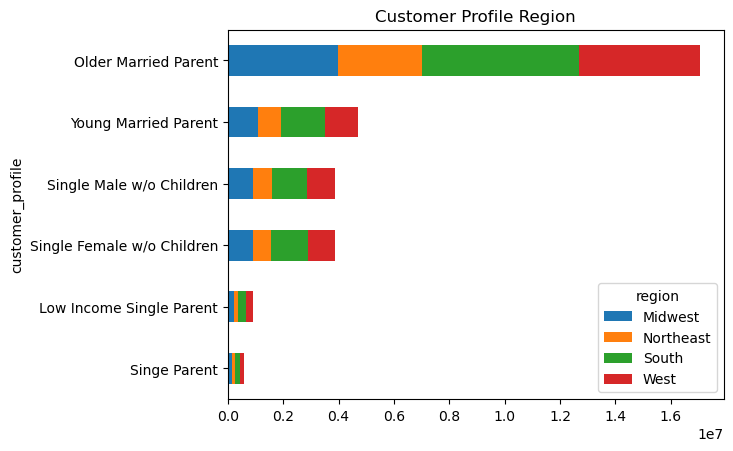

In [92]:
# Create bar chart

customer_profile_region = customer_profile_region.plot.barh(stacked = True, title ='Customer Profile Region')

In [93]:
#Export the Visualization
customer_profile_region.figure.savefig(os.path.join(path,'customer_profile_region.png'),bbox_inches='tight')

******

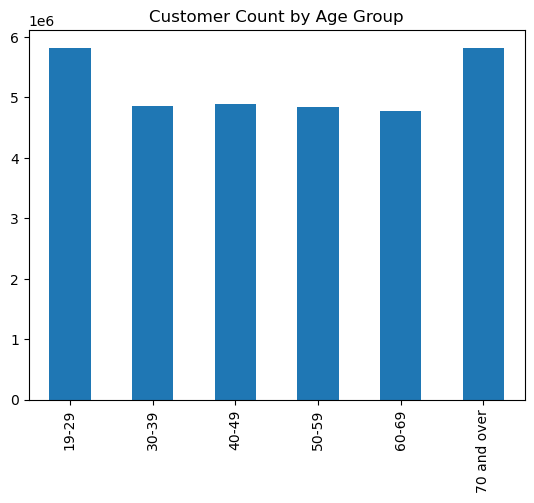

In [94]:
#Create a bar chart for 'age_group'
bar_age_group=df_high_merged['age_group'].value_counts().sort_index().plot.bar(title='Customer Count by Age Group')


Analytical Insight: Most customers at Instacart tend to be young individuals from age 18-29 and elderly individuals age 70 and over. This might be due to the pandemic forcing elderly individuals to order groceries from home. In addition, young people between the ages of 19-29 tend to be more adept at using new technology and software.

In [95]:
#Export the Bar Chart
bar_age_group.figure.savefig(os.path.join(path,'bar_age_group.png'))

In [96]:
path=r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /04 Analysis/Visualizations'

## Age Group vs. family status ordering habits

In [97]:
#Group by 'age_group' and 'fam_status'
age_fam_status=df_high_merged.groupby(['age_group','fam_status']).size().unstack()

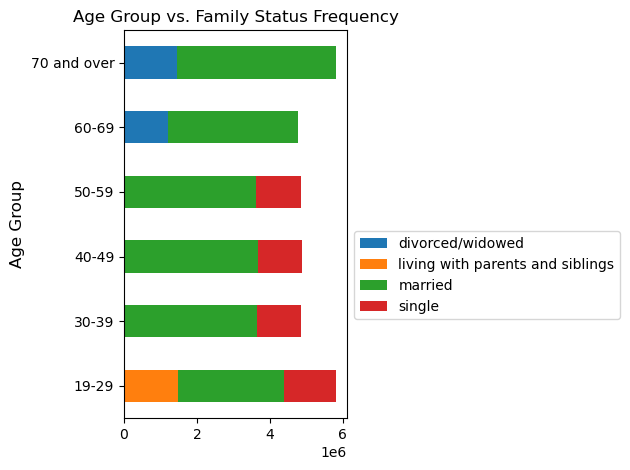

In [98]:
#Create a bar chart Visualization
age_fam_status_bar=age_fam_status.plot.barh(stacked=True,title='Age Group vs. Family Status Frequency')
plt.ylabel('Age Group',fontsize=12)
plt.legend(bbox_to_anchor=(1.0,0.5))
plt.tight_layout()


In [99]:
#Export the Visualization 
age_fam_status_bar.figure.savefig(os.path.join(path,'age_fam_status_bar.png'),bbox_inches='tight')

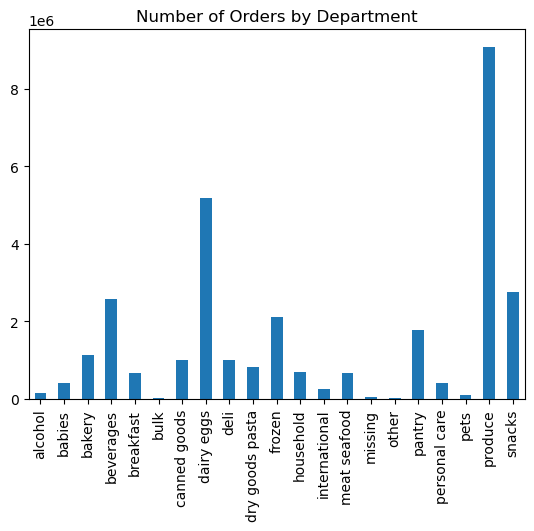

In [100]:
#Create a barchart for departments and number of orders
bar_department_order=df_high_merged['department'].value_counts().sort_index().plot.bar(title='Number of Orders by Department')


Analytical Insight:Departments like Produce, dairy/eggs, snacks, and beverages are the top departments. Produce/dairy/eggs make a massive share of the overall sales in Instacart.

In [101]:
#Export the bar chart
bar_department_order.figure.savefig(os.path.join(path,'bar_department_order.png'),bbox_inches='tight')




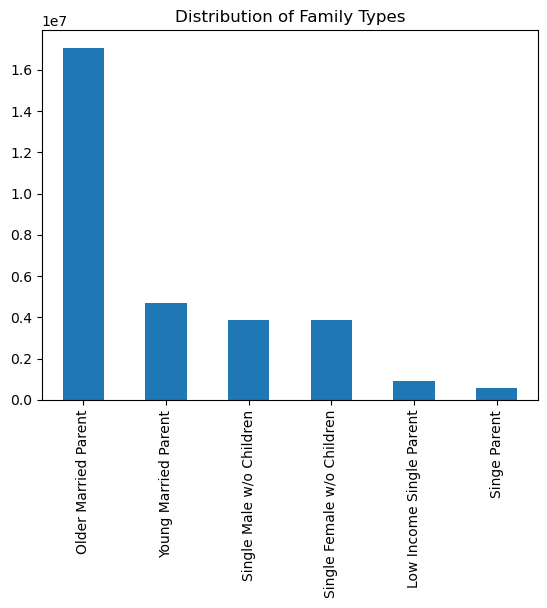

In [102]:
#Create a bar chart to show 'customer profile' of families vs. count
bar_family_status=df_high_merged['customer_profile'].value_counts().plot.bar(title='Distribution of Family Types')

Anayltical Insights: 'Family' and 'Big Family' make such a large portion of total sales that programs and advertisements directed towards family members. Single Adults and Young parents make a smaller portion, but can still benefit from unique programs reaching out to them.

In [103]:
#Export the Bar chart
bar_family_status.figure.savefig(os.path.join(path,'bar_family_status.png'))

In [104]:
df_high_merged['busiest_period_of_day'].value_counts(dropna=False)

Most orders       20199259
Average orders     9559500
Fewest orders      1233905
Name: busiest_period_of_day, dtype: int64

## Step 7: Aggregate max,mean, and minimum variables on customer profiles

In [105]:
age_group_agg=df_high_merged.groupby('age_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [106]:
age_group_agg

days_since_prior_order                  prices                    
                               min   max       mean    min      max       mean
age_group                                                                     
19-29                          0.0  30.0  10.815080    1.0  99999.0  12.199361
30-39                          0.0  30.0  10.806591    1.0  99999.0  11.885063
40-49                          0.0  30.0  10.797034    1.0  99999.0  12.271870
50-59                          0.0  30.0  10.842601    1.0  99999.0  11.781495
60-69                          0.0  30.0  10.791780    1.0  99999.0  11.536726
70 and over                    0.0  30.0  10.808538    1.0  99999.0  11.880453

In [107]:
#Aggregate minimum,maximum, and mean on customer 'income_class' for usage and expenditure 
income_group_agg=df_high_merged.groupby('income_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])


In [108]:
age_group_agg

days_since_prior_order                  prices                    
                               min   max       mean    min      max       mean
age_group                                                                     
19-29                          0.0  30.0  10.815080    1.0  99999.0  12.199361
30-39                          0.0  30.0  10.806591    1.0  99999.0  11.885063
40-49                          0.0  30.0  10.797034    1.0  99999.0  12.271870
50-59                          0.0  30.0  10.842601    1.0  99999.0  11.781495
60-69                          0.0  30.0  10.791780    1.0  99999.0  11.536726
70 and over                    0.0  30.0  10.808538    1.0  99999.0  11.880453

In [109]:
#Aggregate the minimum,maximum, and mean on customer 'income_group' for usage and expenditure 
income_group_agg=df_high_merged.groupby('income_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [110]:
income_group_agg

days_since_prior_order                  prices           \
                                 min   max       mean    min      max   
income_group                                                            
Lower Income                     0.0  30.0  10.901046    1.0  14900.0   
Middle Income                    0.0  30.0  10.773805    1.0  99999.0   
Upper Income                     0.0  30.0  10.760062    1.0  99999.0   

                          
                    mean  
income_group              
Lower Income    7.456285  
Middle Income   9.404969  
Upper Income   20.041344

In [111]:
#Create a crosstab for 'frequency_flag' vs. 'age_group'
age_group_frequency=pd.crosstab(df_high_merged['frequency_flag'],df_high_merged['age_group'],dropna=False)

In [112]:
age_group_frequency

age_group,19-29,30-39,40-49,50-59,60-69,70 and over
frequency_flag,,,,,,
Frequent Customer,3997642,3307513,3353589,3304894,3267828,3990442
Non-Frequent customer,540359,447802,463732,454855,452210,538485
Regular Customer,1285020,1096314,1070254,1086749,1046147,1288829


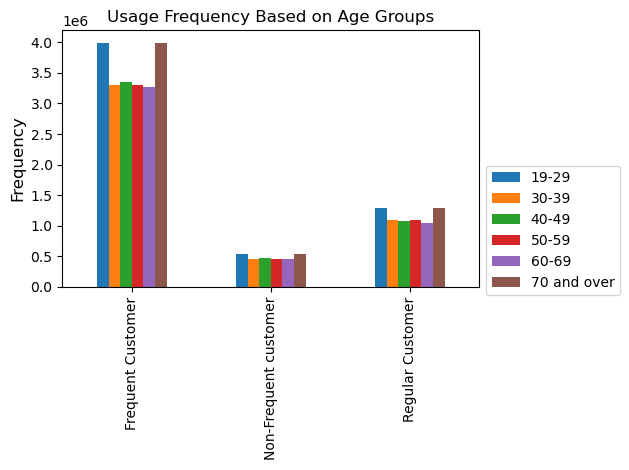

In [113]:
#Create a bar chart to visualize the 'frequency_flag' vs. 'age_group'
bar_age_frequency=age_group_frequency.plot.bar()
plt.xlabel('',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Usage Frequency Based on Age Groups',fontsize=12)
plt.legend(bbox_to_anchor=(1.0,0.5))
plt.tight_layout()

Analytical Insight: Frequent customers are the largest portion of customers. This suggests high customer loyalty and returning frequency, or that the dataset was filtered for only high activity customers. 

In [114]:
#Export the bar chart Visualization 
bar_age_frequency.figure.savefig(os.path.join(path,'bar_age_frequency.png'))

In [115]:
path=r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /04 Analysis/Visualizations'

## Step 8: Aggregate Minimum,Maximum, and Mean on customer Profile for usage and expenditure 

In [116]:
#Aggregate Min,max,and mean on customer profile for usage and expenditure 
department_customer_profile=df_high_merged.groupby(['customer_profile','department'])[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [117]:
department_customer_profile

days_since_prior_order        \
                                                          min   max   
customer_profile         department                                   
Low Income Single Parent alcohol                          0.0  30.0   
                         babies                           0.0  30.0   
                         bakery                           0.0  30.0   
                         beverages                        0.0  30.0   
                         breakfast                        0.0  30.0   
...                                                       ...   ...   
Young Married Parent     pantry                           0.0  30.0   
                         personal care                    0.0  30.0   
                         pets                             0.0  30.0   
                         produce                          0.0  30.0   
                         snacks                           0.0  30.0   

                                                  prices                  
                                             mean    min   max      mean  
customer_profile         department                                       
Low Income Single Parent alcohol         9.805680    1.0  15.0  8.323585  
                         babies         10.266774    1.1  15.0  7.663217  
                         bakery         10.902613    1.0  15.0  7.904946  
                         beverages      10.883587    1.0  15.0  7.562935  
                         breakfast      10.721895    1.0  14.9  7.889815  
...                                           ...    ...   ...       ...  
Young Married Parent     pantry         10.884595    1.0  20.0  8.015353  
                         personal care  11.302709    1.0  15.0  7.965118  
                         pets           11.704228    1.0  15.0  7.963770  
                         produce        10.575161    1.0  15.0  7.964583  
                         snacks         10.629913    1.6   7.0  4.282522  

[126 rows x 6 columns]

In [118]:
#Create a crosstab the relationship of 'age_category' and 'income_group' of customer profile in different regions 
income_group_region=df_high_merged.groupby('region')[['income_group']].value_counts().reset_index(name='count')

In [119]:
income_group_region

,region,income_group,count
0,Midwest,Middle Income,2774387
1,Midwest,Lower Income,2302653
2,Midwest,Upper Income,2190667
3,Northeast,Middle Income,2107868
4,Northeast,Lower Income,1731681
5,Northeast,Upper Income,1630519
6,South,Middle Income,3977522
7,South,Lower Income,3317045
8,South,Upper Income,3025895
9,West,Middle Income,3029186


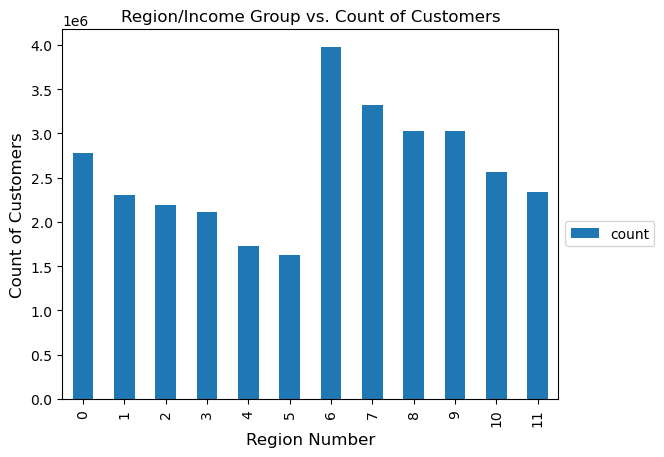

In [120]:
#Create a bar chart for 'income_age_region'
income_group_region_bar=income_group_region.plot.bar()
plt.xlabel('Region Number',fontsize=12)
plt.ylabel('Count of Customers',fontsize=12)
plt.title('Region/Income Group vs. Count of Customers',fontsize=12)
plt.legend(bbox_to_anchor=(1.0,0.5))

Analytical Insight: The Southern regions have the highest number of active customers. The Northeast has the fewest active customers.


In [121]:
#Export the 'income_age_region' Visualization 
income_group_region_bar.figure.savefig(os.path.join(path,'income_group_region_bar.png'),bbox_inches='tight')

In [122]:
#Create a crosstab for 'frequency_flag' vs. 'fam_status'
frequency_fam_status=pd.crosstab(df_high_merged['frequency_flag'],df_high_merged['fam_status'],dropna=False)

In [123]:
frequency_fam_status

fam_status,divorced/widowed,living with parents and siblings,married,single
frequency_flag,,,,
Frequent Customer,1820300,1031522,14900794,3469292
Non-Frequent customer,244245,138914,2040875,473409
Regular Customer,583216,312175,4821352,1156570


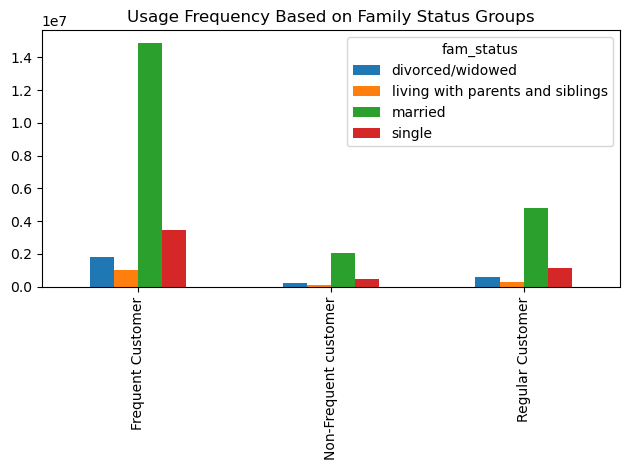

In [124]:
#Create a bar chart to visualize 'fam_Status' vs. 'frequency_flag'
frequency_fam_status_bar=frequency_fam_status.plot.bar(title='Usage Frequency Based on Family Status Groups')
plt.xlabel('',fontsize=12)
plt.ylabel('',fontsize=12)
plt.tight_layout()

Analytical Insight: Although in all 3 Frequency groups the proportion of which family type is most common, the proportion of married customers is greatest of the frequent customers. This suggests that Family members tend to be the most loyal of all.

In [125]:
#Export the bar chart Visualization 
frequency_fam_status_bar.figure.savefig(os.path.join(path,'frequency_fam_status_bar.png'),bbox_inches='tight')

In [126]:
#Create a crosstab of 'age_group' vs. 'spending_flag'
age_spending_flag=pd.crosstab(df_high_merged['spending_flag'],df_high_merged['age_group'],dropna=False)

In [127]:
age_spending_flag

age_group,19-29,30-39,40-49,50-59,60-69,70 and over
spending_flag,,,,,,
High spender,109142,92383,108553,87139,97550,109817
Low spender,5713879,4759246,4779022,4759359,4668635,5707939


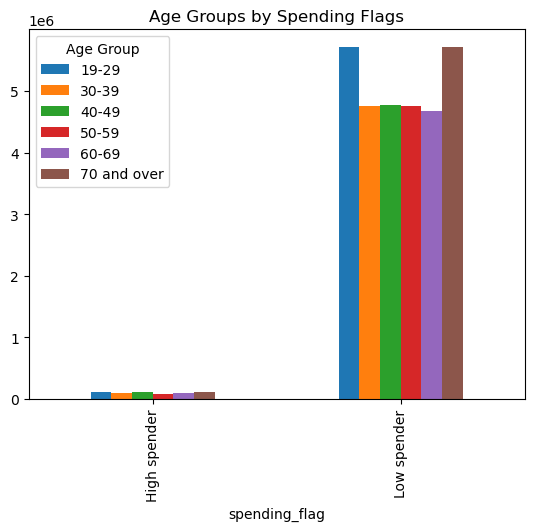

In [128]:
#Create a bar chart of crosstab
age_spending_flag_bar=age_spending_flag.plot.bar(title='Age Groups by Spending Flags')
legend=age_spending_flag_bar.legend(title='Age Group')


Analytical Insight: In the high spending category of customers, each age group is similar in the amount they spend. However, in the low spending group of customers the youngest and the eldest age groups spent the most. This may be because the casual instacart customers the middle age groups tend to also shop at other places. While the youngest cohort wants the most convenience and they are the most comfortable with using instacart.

In [129]:
#Export the Bar chart Visualization 
age_spending_flag_bar.figure.savefig(os.path.join(path,'age_spending_flag_bar.png'),bbox_inches='tight')

In [130]:
#Create a crosstab of 'fam_status vs.  'spending_flag'
fam_status_spending=pd.crosstab(df_high_merged['spending_flag'],df_high_merged['fam_status'],dropna=False)

In [131]:
fam_status_spending


fam_status,divorced/widowed,living with parents and siblings,married,single
spending_flag,,,,
High spender,50381,27970,430128,96105
Low spender,2597380,1454641,21332893,5003166


ValueError: 'center_left' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

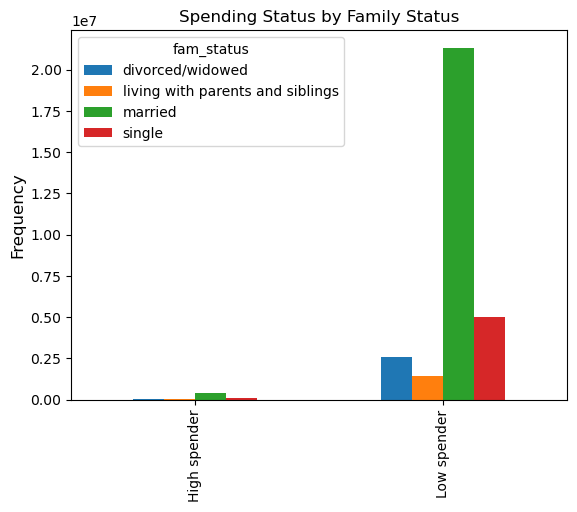

In [132]:
#Create a bar chart for crosstab
fam_status_spending_bar=fam_status_spending.plot.bar(title='Spending Status by Family Status')
plt.xlabel('',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.legend(loc='center_left',bbox_to_anchor=(1.0,0.5))
plt.tight_layout()

Analytical Insight: Of all the family groups, it seems that the 'Family' groups spends the most. In the both spending categories, divorced/widowed families spend more than individuals who are single or live with parents and siblings. This makes sense since divorced or widowed individuals tend to be older with more money and maybe more dependants to feed.

In [133]:
#Export the bar chart Visualization 
fam_status_spending_bar.figure.savefig(os.path.join(path,'fam_status_spending_bar.png'),bbox_inches='tight')

## Orders aggregated by Marital Status 

In [134]:
#Aggregate 'fam_status' by orders 
df_high_merged.groupby('fam_status').agg({'order_number':['min','mean','max']})

order_number               
                                          min       mean max
fam_status                                                  
divorced/widowed                            1  17.992636  99
living with parents and siblings            1  18.000917  99
married                                     1  17.778091  99
single                                      1  17.940004  99

In [135]:
#Group 'fam_status' and aggregated data 
df_high_merged.groupby('fam_status').agg({'order_number':['min','max','mean']})

order_number               
                                          min max       mean
fam_status                                                  
divorced/widowed                            1  99  17.992636
living with parents and siblings            1  99  18.000917
married                                     1  99  17.778091
single                                      1  99  17.940004

******The married customers have the highest frequency of orders, by a significant difference to the next highest group, the singles. The living with parents and siblings group has the least amount of orders.

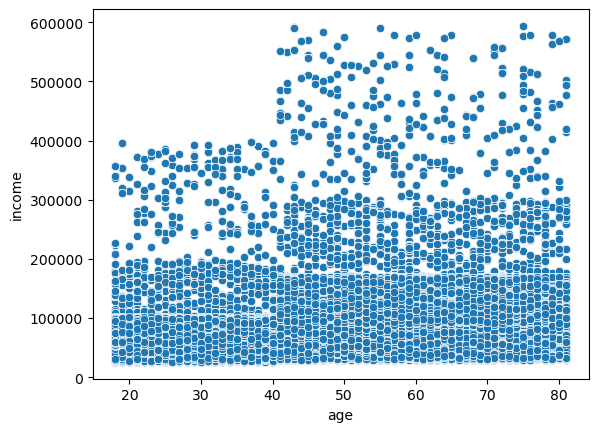

In [136]:
#Create a scatterplot of the 'age_group' and 'income_group' 
age_income_scatterplot=sns.scatterplot(x='age',y='income',data=df_high_merged)

Analytical Insight: The scatterplot shows a notable increase in spending power after age 40.

In [137]:
path=r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /04 Analysis/Visualizations'

In [138]:
#Export the Visualization 
age_income_scatterplot.figure.savefig(os.path.join(path,'age_income_scatterplot.png'),bbox_inches='tight')

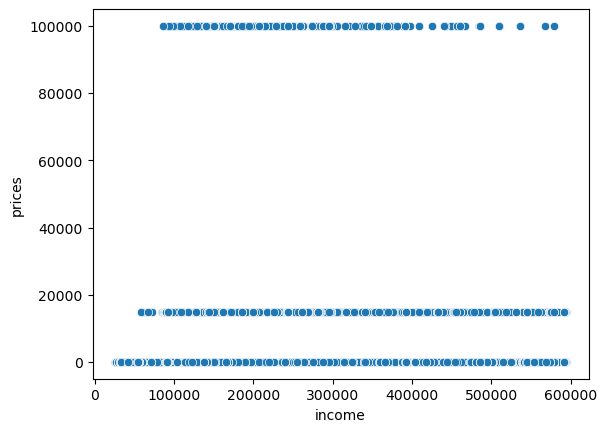

In [139]:
#Create a scatterplot of the 'price' and 'income' 
price_income_scatterplot=sns.scatterplot(x='income',y='prices',data=df_high_merged)

Analytical Insight: counter intuitively, as income increases, the frequency of expensive items decreases. 

In [140]:
#Export the Visualization 
price_income_scatterplot.figure.savefig(os.path.join(path,'price_income_scatterplot.png'),bbox_inches='tight')

In [141]:
#Create a crosstab for 'frequency_flag' and 'income_group'
income_frequency=pd.crosstab(df_high_merged['frequency_flag'],df_high_merged['income_group'],dropna=False)


In [142]:
income_frequency

income_group,Lower Income,Middle Income,Upper Income
frequency_flag,,,
Frequent Customer,6732444,8167897,6321567
Non-Frequent customer,986505,1074331,836607
Regular Customer,2197389,2646735,2029189


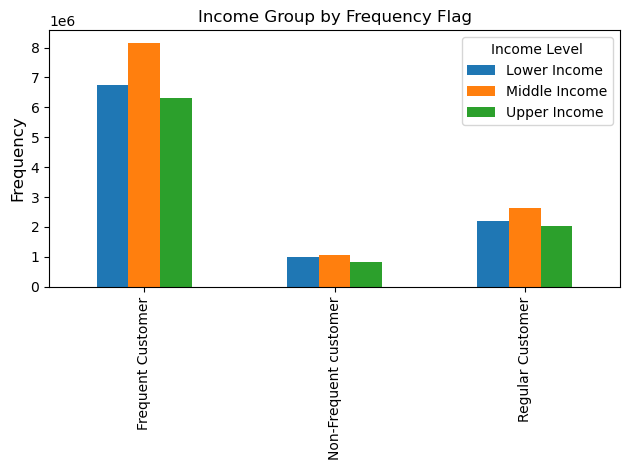

In [143]:
#Create a bar chart to visualize the 'income_Frequency' crosstab
income_frequency_bar=income_frequency.plot.bar(title='Income Group by Frequency Flag')
plt.xlabel('',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.legend(title='Income Level')
plt.tight_layout()

Analytical Insight:  In all categories the middle income individuals make the largest share of orders due to their sheer size as a group. However, the Middle income group has the largest lead in the 'Frequent Customer' category. This suggests that Middle income individuals tent to be frequent customers more than Non-Frequent or Regular customers.

In [144]:
#Export the Visualization 
income_frequency_bar.figure.savefig(os.path.join(path,'income_frequency_bar.png'),bbox_inches='tight')

In [145]:
#Create a crosstab for 'age_group' vs. 'income_group' in the different regions
profile_age_region=df_high_merged.groupby('region')[['income_group','age_group']].value_counts().reset_index(name='count')

In [146]:
profile_age_region

,region,income_group,age_group,count
0,Midwest,Lower Income,19-29,817400
1,Midwest,Lower Income,30-39,706823
2,Midwest,Upper Income,70 and over,617654
3,Midwest,Upper Income,50-59,543504
4,Midwest,Middle Income,70 and over,530675
...,...,...,...,...
67,West,Lower Income,70 and over,237942
68,West,Lower Income,50-59,205614
69,West,Lower Income,60-69,186523
70,West,Upper Income,19-29,16898


In [147]:
#Create a crosstab for 'age_group' vs. 'region'
age_region=pd.crosstab(df_high_merged['region'],df_high_merged['age_group'],dropna=False)

In [148]:
age_region

age_group,19-29,30-39,40-49,50-59,60-69,70 and over
region,,,,,,
Midwest,1356946,1128320,1175882,1149210,1109516,1347833
Northeast,1025132,848422,860342,850120,844666,1041386
South,1962570,1648895,1602389,1582024,1592244,1932340
West,1478373,1225992,1248962,1265144,1219759,1496197


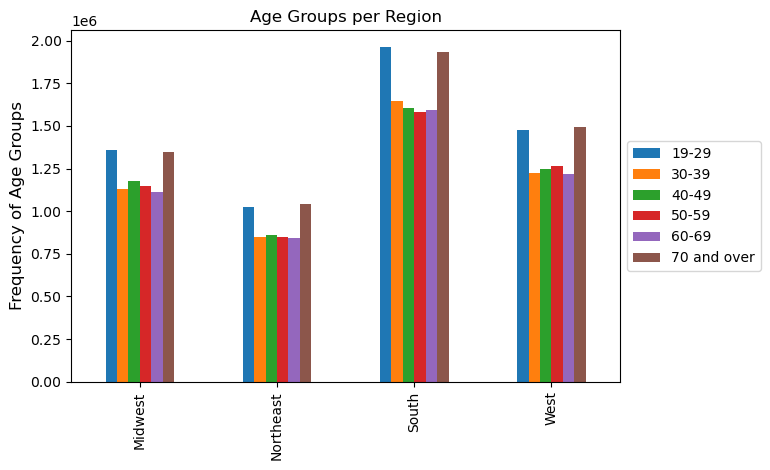

In [149]:
#Create a bar chart of the age_region crosstab
bar_age_region=age_region.plot.bar(title='Age Groups per Region')
plt.xlabel('',fontsize=12)
plt.ylabel('Frequency of Age Groups',fontsize=12)
plt.tight_layout()
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))

Analytical Insight:In the midwest the 40-49 age group purchases more than other middle age cohorts compared to other regions.  Similarily in the West, the 50-59 Age group stands out compared to the same age group in other regions. In the South, the 40-60 Age groups show less activity compared to those ages in other regions.

In [150]:
#Export the Visualization 
bar_age_region.figure.savefig(os.path.join(path,'bar_age_region.png'),bbox_inches='tight')

In [151]:
#Create a crosstab for 'income_group' vs. 'region'
region_income=pd.crosstab(df_high_merged['income_group'],df_high_merged['region'],dropna=False)

In [152]:
region_income

region,Midwest,Northeast,South,West
income_group,,,,
Lower Income,2302653,1731681,3317045,2564959
Middle Income,2774387,2107868,3977522,3029186
Upper Income,2190667,1630519,3025895,2340282


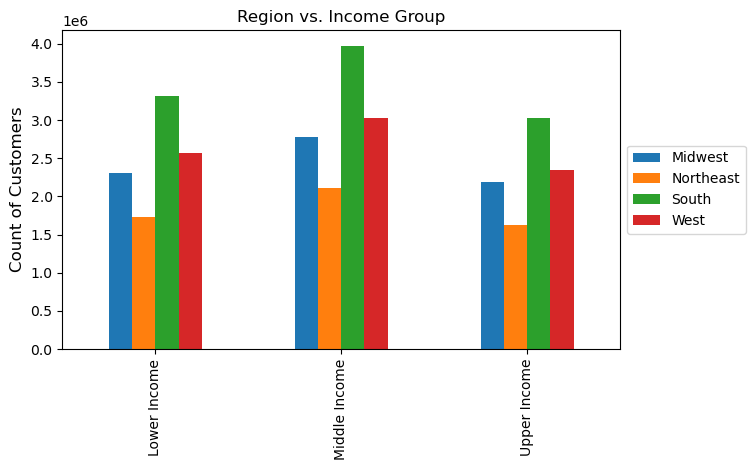

In [153]:
region_income_bar=region_income.plot.bar(title='Region vs. Income Group')
plt.xlabel('',fontsize=12)
plt.ylabel('Count of Customers',fontsize=12)
plt.tight_layout()
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))

Analytical Insight: Considering the ratio of low income to high income individuals in society, it seems that lower income customers are under-represented. 

In [154]:
#Export the bar chart
region_income_bar.figure.savefig(os.path.join(path,'region_income_bar.png'),bbox_inches='tight')

## Step 9: Produce Visualization based on aggregated and wrangled data

In [155]:
#Create a crosstab of 'department' vs. 'customer_profile'
customer_family_department=df_high_merged.groupby(['department','customer_profile']).size().unstack(fill_value=0)

In [156]:
customer_family_department

customer_profile,Low Income Single Parent,Older Married Parent,Singe Parent,Single Female w/o Children,Single Male w/o Children,Young Married Parent
department,,,,,,
alcohol,5054,77265,3326,18621,18231,22177
babies,11179,227487,8202,50469,52859,60196
bakery,31478,618742,22432,139885,142601,169888
beverages,74405,1420470,44703,322425,322924,387007
breakfast,20649,372608,12845,83893,84432,103668
bulk,1055,18603,578,4081,3919,5215
canned goods,28621,557758,19856,124165,126855,154819
dairy eggs,150041,2849782,100987,649869,648346,792803
deli,29365,551078,18754,126183,127199,151255


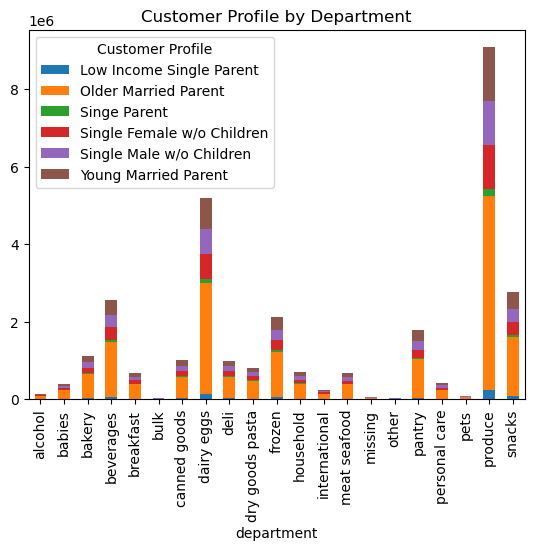

In [157]:
#Create a stacked bar graph to visualize 'department' vs. 'customer_profile'
customer_family_department_stacked=customer_family_department.plot.bar(stacked=True,title='Customer Profile by Department')
legend=customer_family_department_stacked.legend(title='Customer Profile')

Analytical Insight: Young parents tend to spend more on produce and dairy eggs like all other family groups, however they are not buying much deli. This may suggest that their children do not like Deli Department.

In [158]:
#Export the stacked bar chart
customer_family_department_stacked.figure.savefig(os.path.join(path,'customer_family_department_stacked.png'),bbox_inches='tight')

In [159]:
#Create a crosstab to show relationship between 'age_group' vs. 'department'
age_group_department=pd.crosstab(df_high_merged['age_group'],df_high_merged['department'])

In [160]:
age_group_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
19-29,27942,77758,211198,477658,129590,6414,192170,978948,188533,155887,...,130400,48830,126384,12569,6856,334239,79564,18163,1699431,521914
30-39,23720,63698,176204,396525,104860,5210,157546,819338,157312,127612,...,108705,40016,104117,9930,5262,277986,65274,13757,1429422,436373
40-49,22442,67072,177348,406673,107401,5384,158811,822139,158399,128379,...,110817,40773,106314,10573,5230,281527,68076,14484,1431873,430737
50-59,22940,63126,176625,407398,106039,5019,159100,803744,156255,130156,...,109300,39924,105217,9909,5459,279134,67726,14904,1414429,436649
60-69,21514,63052,172651,394292,102703,5180,156299,791885,155403,126191,...,107593,38822,105313,9836,5410,276272,65285,14765,1402897,421042
70 and over,26116,75686,211000,489388,127502,6244,188148,975774,187932,153911,...,133043,47626,127440,11951,6194,333745,78490,16992,1701224,519691


<Figure size 1200x600 with 0 Axes>

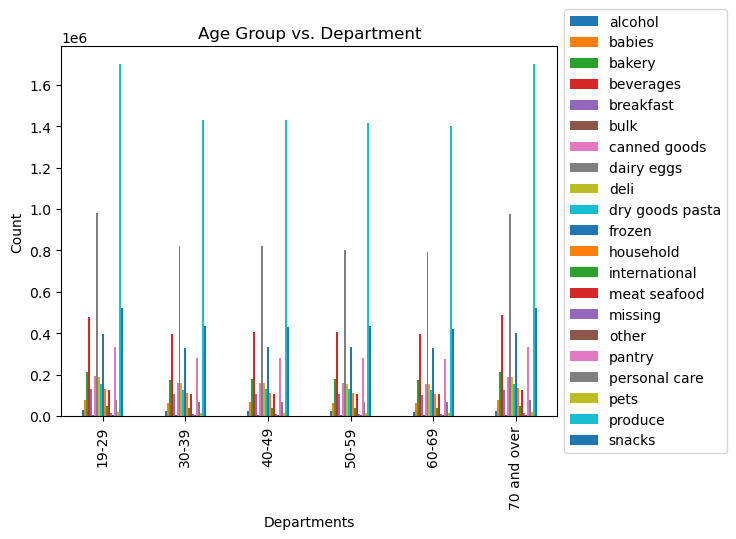

In [161]:
#Create a stacked bar chart to visualize 'age_group_department'
plt.figure(figsize=(12,6))
age_group_department_stacked=age_group_department.plot(kind='bar',title='Age Group vs. Department')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))

Analytical Insights: In the 'personal care' department the middle aged groups buy a higher proportion of goods than their 18-29 and 70 and over group.

In [162]:
#Export the stacked Bar chart Visualization
age_group_department_stacked.figure.savefig(os.path.join(path,'age_group_department_stacked.png'),bbox_inches='tight')

In [163]:
#Create a crosstab for 'customer_profile' vs. 'region'
customer_profile_region=pd.crosstab(df_high_merged['customer_profile'],df_high_merged['region'],dropna=False)

In [164]:
customer_profile_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Low Income Single Parent,211236,148050,307399,229206
Older Married Parent,3996925,3028449,5660866,4375111
Singe Parent,140456,108733,198506,139025
Single Female w/o Children,906419,664320,1315552,975841
Single Male w/o Children,918068,691508,1268800,1006524
Young Married Parent,1094603,829008,1569339,1208720


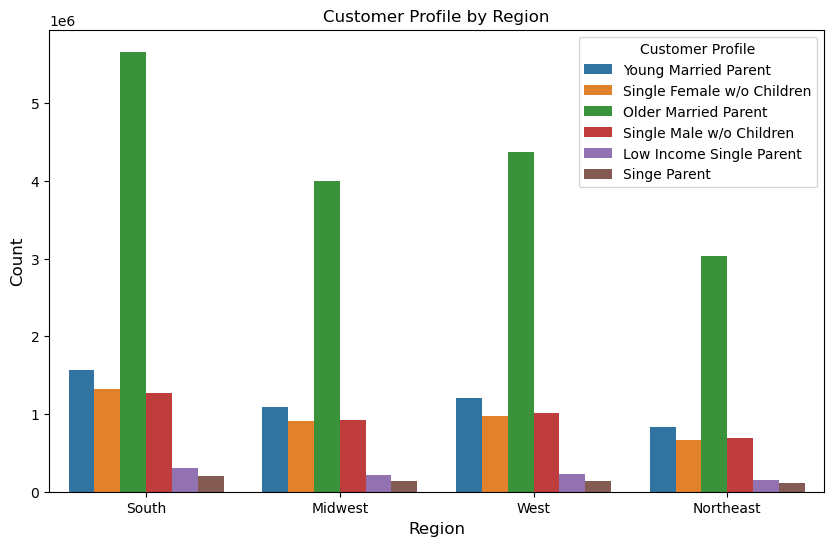

In [165]:
#Create a comparison barchart to visualize 'customer_profile' vs. 'region'
plt.figure(figsize=(10,6))
customer_profile_region_bar=sns.countplot(x='region',hue='customer_profile',data=df_high_merged)
plt.xlabel('Region',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Customer Profile by Region')
plt.legend(title='Customer Profile')

Analytical Insights: Of all the regions the south seems to have 'family' fam_status as the most common customers. In addition, in the south the share of 'Family' and 'Big Family' are the largest share of the customer base compared to the other regions.

In [166]:
#Export the Bar chart Visualization
customer_profile_region_bar.figure.savefig(os.path.join(path,'customer_profile_region_bar.png'),bbox_inches='tight')

In [167]:
path=r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /02 Data/Prepared Data'

In [168]:
df_high_merged.to_pickle(os.path.join(path,'df_high_merged.pkl'))

## 1. The sales team wants to know which are the busiest days of the week and hours of the day.


([<matplotlib.axis.XTick at 0x480b5ced0>,
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

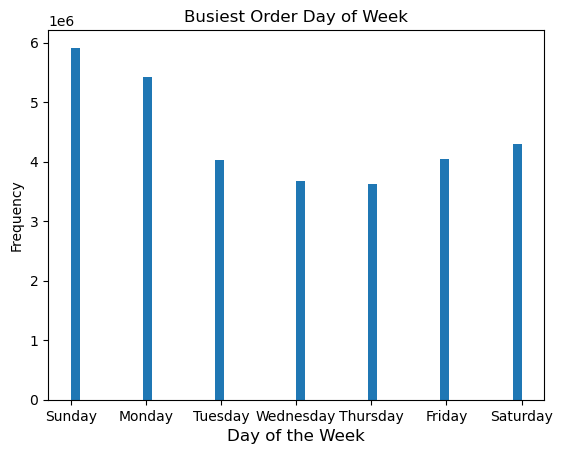

In [169]:
histogram_day_of_week=df_high_merged['order_dow'].plot.hist(bins=50,title='Busiest Order Day of Week')
plt.xlabel('Day of the Week',fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

The most orders take place on Sunday and monday, followed by saturday. This suggests the weekends are when most people do their grocery shopping. 

In [170]:
#Export the Visualization
histogram_day_of_week.figure.savefig(os.path.join(path,'histogram_day_of_week.png'),bbox_inches='tight')

Text(0.5, 0, 'Hour of Day')

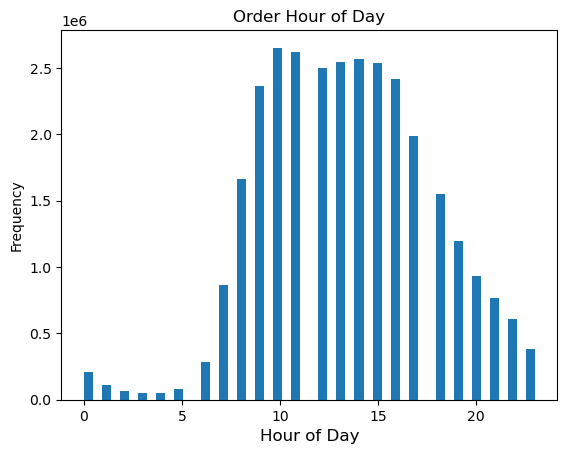

In [171]:
#Create a histogram visualization for busiest hour of the day
histogram_hour_of_day=df_high_merged['order_hour_of_day'].plot.hist(bins=50,title='Order Hour of Day')
plt.xlabel('Hour of Day',fontsize=12)


Analytical Insight: The peak order time is 9AM to 4PM.

In [172]:
path=r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /04 Analysis/Visualizations'

In [173]:
#Export the Visualization
histogram_hour_of_day.figure.savefig(os.path.join(path,'histogram_hour_of_day.png'),bbox_inches='tight')

Analytical Insight: The busiest days of the week are Saturday and Sunday. Tuesday and Wednesday are the least busiest. Monday, Thursday, and Friday are in the middle ground.

The busiest hours of the day ranges from 9am to 4pm during working hours. The least busiest hours are between 10pm to 7am. The order frequency start to climb at 7am, then peak in early afternoon until it slows down during early evening.

In [174]:
#Determine which customer profiles are ordering at different hours of the day
customer_profile_day_of_week=df_high_merged.groupby(['order_dow','customer_profile']).size().unstack()

In [175]:
#sort the values by ascending order
customer_profile_day_of_week=customer_profile_day_of_week.loc[customer_profile_day_of_week.sum(axis=1).sort_values(ascending=True).index]

([<matplotlib.axis.XTick at 0x333478690>,
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

<Figure size 1000x800 with 0 Axes>

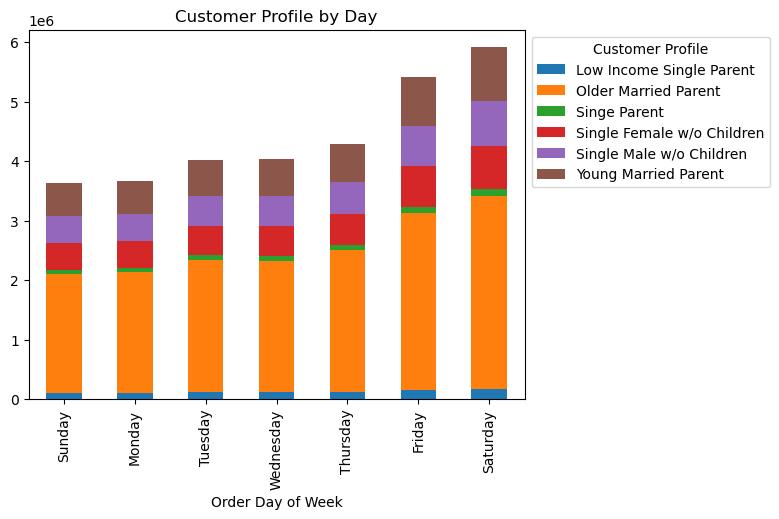

In [176]:
#Create a Stacked Bar Chart
plt.figure(figsize=(10,8))
customer_profile_day_of_week_stacked = customer_profile_day_of_week.plot.bar(stacked=True, title='Customer Profile by Day')
plt.legend(title='Customer Profile', loc='upper left', bbox_to_anchor=(1,1))
plt.xlabel('Order Day of Week')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])



Analytical Insight: Friday and Saturday are the busiest days for all customer profiles. 

In [177]:
#Export the Visualization
customer_profile_day_of_week_stacked.figure.savefig(os.path.join(path,'customer_profile_day_of_week_stacked.png'),bbox_inches='tight')

In [178]:
#Group customer income profile and price range 
customer_income_profile_bar=df_high_merged.groupby(['customer_profile','price_range_loc']).size().unstack()

In [179]:
#Sort the values
customer_income_profile_bar=customer_income_profile_bar.loc[customer_income_profile_bar.sum(axis=1).sort_values(ascending=True).index]

In [180]:
df_high_merged['customer_income_profile'].value_counts(dropna=False)

Middle Income Married Older Parent          7158802
Upper Income Married Older Parent           6845471
Low Income Married Older Parent             4761165
Low Income Married Young Parent             1782321
Middle Income Single Female w/o Children    1484710
Middle Income Single Male w/o Children      1461673
Low Income Single Male w/o Children         1257921
Low Income Single Female w/o Child          1219040
Upper Income Single Male w/o Children       1165306
Upper Income Single Female w/o Children     1158382
Middle Income Married Young Parent          1071368
NaN                                         1039785
Middle Income Single Parent                  568516
Upper Income Single Parent                    18204
Name: customer_income_profile, dtype: int64

## Patterns in orders based on Customer Income Profile

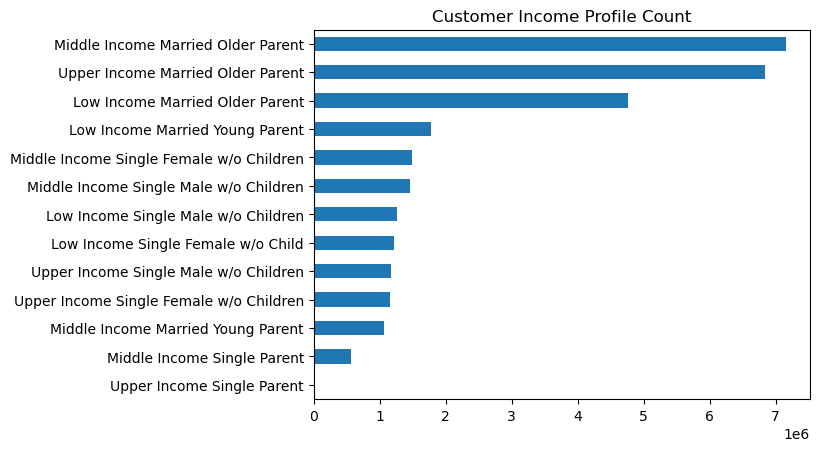

In [181]:
#Create a bar chart to show Customer Income Profile Counts
customer_income_profile_bar=df_high_merged['customer_income_profile'].value_counts().sort_values(ascending=True).plot.barh(title='Customer Income Profile Count')

Analytical Insight: The top 4 categories, and a majority of all orders are from customers who are married and parents. Then the following category is Middle income without children. Upper income married older parents are greatly over represented in total orders. This might be because they have many children and more funds to spend. 

In [182]:
#Export the Visualization
customer_income_profile_bar.figure.savefig(os.path.join(path,'customer_income_profile_bar.png'),bbox_inches='tight')

In [183]:
#Group Customer Profile and Departments
customer_income_profile_price_range=df_high_merged.groupby(['customer_income_profile','price_range_loc']).size().unstack()

In [184]:
#Sort values
customer_income_profile_price_range=customer_income_profile_price_range.loc[customer_income_profile_price_range.sum(axis=1).sort_values(ascending=True).index] 

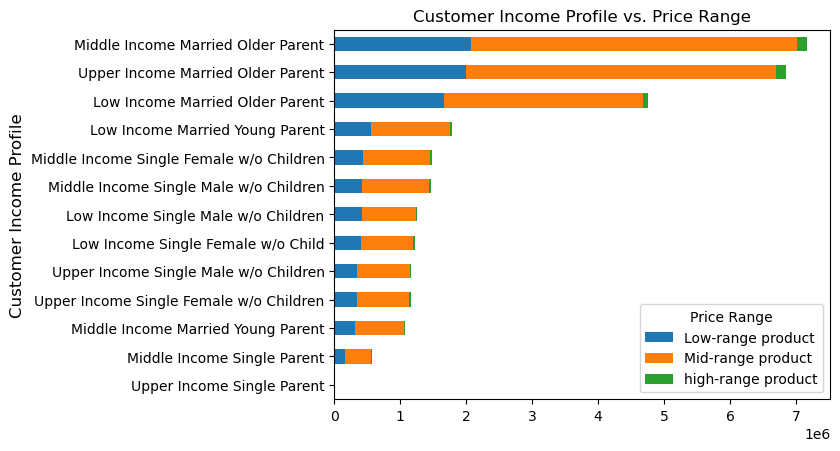

In [185]:
#Create a bar chart
customer_income_profile_price_range_bar_chart=customer_income_profile_price_range.plot.barh(stacked=True,title='Customer Income Profile vs. Price Range')
plt.ylabel('Customer Income Profile',fontsize=12)
plt.legend(title='Price Range')

Analytical Insight: The higher frequency of mid-range product orders is consistent across  'customer Income profile' groups.
The higher frequency of mid-range product orders is also consistent across the customer income profile groups, regardless of customer income.


In [186]:
#Export the Visualization 
customer_income_profile_price_range_bar_chart.figure.savefig(os.path.join(path,'customer_income_profile_price_range_bar.png'),bbox_inches='tight')

In [187]:
#Group Customer Income Profile and Loyalty Flag
customer_income_profile_frequency=df_high_merged.groupby(['customer_income_profile','frequency_flag']).size().unstack()

In [188]:
#Sort in order
customer_income_profile_frequency=customer_income_profile_frequency.loc[customer_income_profile_frequency.sum(axis=1).sort_values(ascending=True).index]

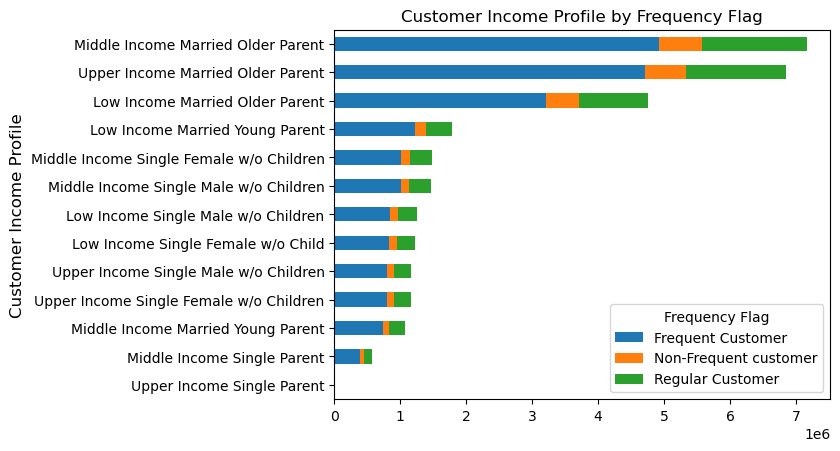

In [189]:
#Create a bar chart 
customer_income_profile_frequency_bar=customer_income_profile_frequency.plot.barh(stacked=True,title='Customer Income Profile by Frequency Flag')
plt.ylabel('Customer Income Profile',fontsize=12)
legend=customer_income_profile_frequency_bar.legend(title='Frequency Flag')




Analytical Insight: The most common customer income profile characteristic is married older parent, followed by 'Low Income' customers, followed by 'Middle Income' customer group. 

In [190]:
#Export the Visualization
customer_income_profile_frequency_bar.figure.savefig(os.path.join(path,'customer_income_profile_frequency_bar.png'),bbox_inches='tight')

In [191]:
#Create a stacked bar chart Visualization for Customer Income Profile and Department 
customer_income_profile_department=df_high_merged.groupby(['department','customer_profile']).size().unstack()

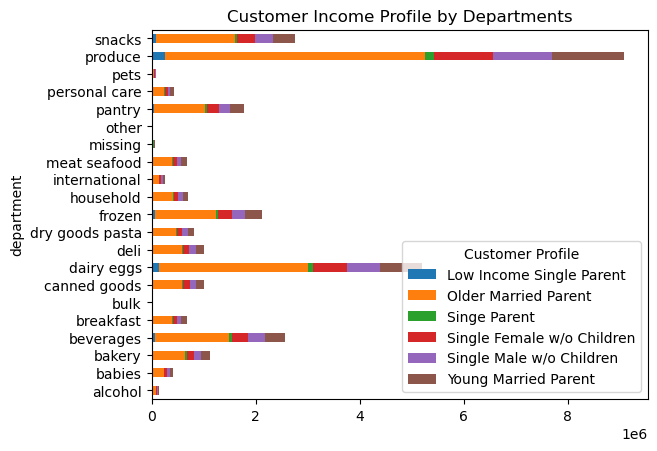

In [192]:
customer_income_profile_department_bar=customer_income_profile_department.plot.barh(stacked=True,title='Customer Income Profile by Departments')
legend = customer_income_profile_department_bar.legend(title="Customer Profile")


Analytical Insight: The most popular customer profile is Older Married Parent. Followed by Young Married Parent. Third most popular customer profile is Single Female w/o Children. 

In [193]:
path=r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /04 Analysis/Visualizations'

In [194]:
#Export the Visualization 
customer_income_profile_department_bar.figure.savefig(os.path.join(path,'customer_income_profile_department.png'),bbox_inches='tight')

**Analytical Insight:

## The marketing team also wants to know which departments have the highest selling products in revenue.

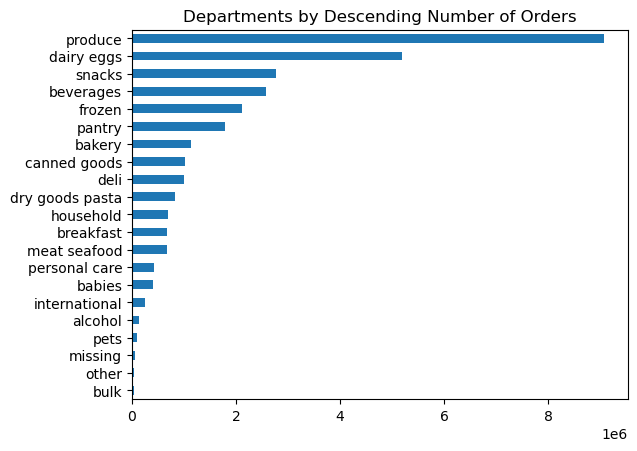

In [195]:
#Create a bar chart from the 'department' column from ascending to descending revenue
department_bar_chart=df_high_merged['department'].value_counts().sort_values(ascending=True).plot.barh(title='Departments by Descending Number of Orders')

Analytical Insight: The most popular departments are produce, dairy eggs, snacks, beverages, and frozen. However, produce department is incredibly popular. The smallest frequencies are for alcohol, pets, missing, other, and bulk.

In [196]:
#Export the Visualization
department_bar_chart.figure.savefig(os.path.join(path,'department_bar_chart.png'),bbox_inches='tight')

In [197]:
#Group by Customer Income Profile and Departments 
customer_profile_department=df_high_merged.groupby(['department','customer_income_profile']).size().unstack()

In [198]:
#Sort in Descending Order
customer_profile_department=customer_profile_department.loc[customer_profile_department.sum(axis=1).sort_values(ascending=True).index]

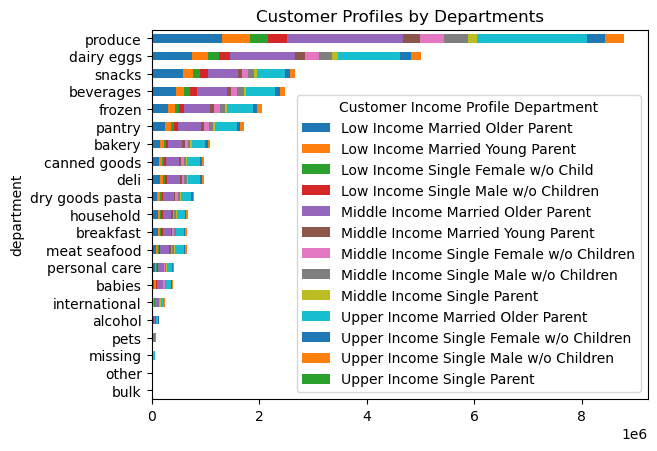

In [199]:
#Create a stacked bar chart 
customer_profile_department=customer_profile_department.plot.barh(stacked=True, title = 'Customer Profiles by Departments')
legend = customer_profile_department.legend(title="Customer Income Profile Department")



Analytical Insight: Middle income married older parent, and upper income Married older Parent are the two most popular customer income profile. The following group is Low Income Married Older Parent.

In [200]:
#Export the Visualization 
customer_profile_department.figure.savefig(os.path.join(path,'customer_profile_department.png'),bbox_inches='tight')

In [201]:
df_high_merged['loyalty_flag'].value_counts(dropna=False)

Regular Customer    15891077
Loyal Customer      10293737
New Customer         4807850
Name: loyalty_flag, dtype: int64

In [202]:
#Group by customer profile and loyalty flag
customer_income_profile_loyalty=df_high_merged.groupby(['customer_income_profile','loyalty_flag']).size().unstack()

In [203]:
#Sort by descending order
customer_income_profile_loyalty=customer_income_profile_loyalty.loc[customer_income_profile_loyalty.sum(axis=1).sort_values(ascending=True).index]

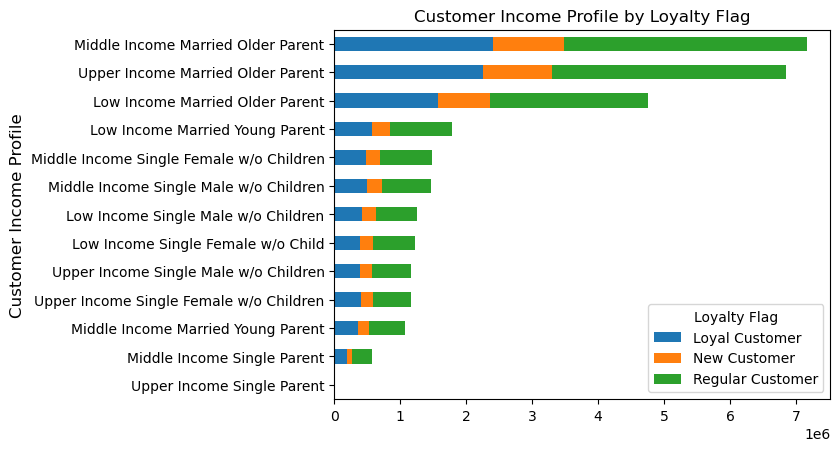

In [204]:
#Create a bar chart
customer_income_profile_loyalty_bar=customer_income_profile_loyalty.plot.barh(stacked=True,title='Customer Income Profile by Loyalty Flag')
plt.ylabel('Customer Income Profile',fontsize=12)
plt.legend(title='Loyalty Flag')

Analytical Insight: Each customer profile group follows a very similar distribution pattern of loyalty flag.

In [205]:
#Export the Visualization
customer_income_profile_loyalty_bar.figure.savefig(os.path.join(path,'customer_income_profile_loyalty.png'),bbox_inches='tight')

In [206]:
#Group Departments and Loyalty Flag to look for trends 
department_loyalty=df_high_merged.groupby(['department','loyalty_flag']).size().unstack()

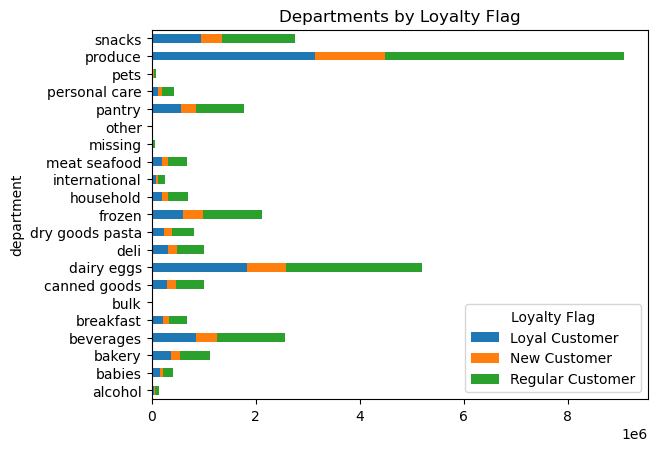

In [207]:
#Create a stacked bar chart to Visualize the loyalty of the customer base for each department.
department_loyalty_bar=department_loyalty.plot.barh(stacked=True,title='Departments by Loyalty Flag')
plt.legend(title='Loyalty Flag')

Analytical Insight: Each product department has a similar distribution of ‘loyalty_flag’. Regular customers outnumber loyal customers. The ‘New Customer’ was a smaller portion of each department.  

In [208]:
#Export the Visualization
department_loyalty_bar.figure.savefig(os.path.join(path,'department_loyalty_bar.png'),bbox_inches='tight')

In [209]:
df_high_merged['price_range_loc'].value_counts(dropna=False)

Mid-range product     20919807
Low-range product      9459127
high-range product      613730
Name: price_range_loc, dtype: int64

In [210]:
df_high_merged['busiest_period_of_day'].value_counts(dropna=False)

Most orders       20199259
Average orders     9559500
Fewest orders      1233905
Name: busiest_period_of_day, dtype: int64

In [211]:
df_high_merged['customer_income_profile'].value_counts(dropna=False)

Middle Income Married Older Parent          7158802
Upper Income Married Older Parent           6845471
Low Income Married Older Parent             4761165
Low Income Married Young Parent             1782321
Middle Income Single Female w/o Children    1484710
Middle Income Single Male w/o Children      1461673
Low Income Single Male w/o Children         1257921
Low Income Single Female w/o Child          1219040
Upper Income Single Male w/o Children       1165306
Upper Income Single Female w/o Children     1158382
Middle Income Married Young Parent          1071368
NaN                                         1039785
Middle Income Single Parent                  568516
Upper Income Single Parent                    18204
Name: customer_income_profile, dtype: int64